In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

# 1. Data Preparation

In [2]:
data = pd.read_csv("data/raw/data_train.csv")
data.shape

(814262, 12)

In [3]:
# unique devices
data['hash'].unique().shape

(134063,)

In [4]:
data[:10]

,Unnamed: 0,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit
0,0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07
1,1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07
2,2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07
3,3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07
4,4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,14:38:09,14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07
5,5,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_5,15:02:31,15:18:33,NaN,NaN,NaN,3.744945e+06,-1.928183e+07,3.744785e+06,-1.928148e+07
6,6,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_0,14:29:23,14:29:23,0.000000,0.000000,0.000000,3.749450e+06,-1.926506e+07,3.749450e+06,-1.926506e+07
7,7,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_1,14:39:49,14:39:49,0.000000,0.000000,0.000000,3.749090e+06,-1.926726e+07,3.749090e+06,-1.926726e+07
8,8,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_2,14:50:14,14:50:14,0.507809,0.507809,0.507809,3.749042e+06,-1.926632e+07,3.749042e+06,-1.926632e+07
9,9,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_3,15:00:32,15:29:48,1.149404,1.149404,1.149404,3.749088e+06,-1.926605e+07,3.749610e+06,-1.926594e+07


In [5]:
data.describe()

,Unnamed: 0,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit
count,814262.000000,256769.000000,256769.000000,270778.000000,8.142620e+05,8.142620e+05,8.142620e+05,8.142620e+05
mean,407130.500000,2.680249,2.279469,2.454799,3.760411e+06,-1.922153e+07,3.760426e+06,-1.922181e+07
std,235057.336784,7.591053,7.118452,7.160578,8.974393e+03,7.632234e+04,8.904451e+03,7.515560e+04
min,0.000000,-1.000000,-1.000000,-1.000000,3.741027e+06,-1.938291e+07,3.740998e+06,-1.937688e+07
25%,203565.250000,0.000000,-1.000000,0.000000,3.755174e+06,-1.927454e+07,3.755359e+06,-1.927308e+07
50%,407130.500000,0.000000,0.000000,0.000000,3.760071e+06,-1.923020e+07,3.760076e+06,-1.923031e+07
75%,610695.750000,0.500000,0.220000,0.440000,3.767509e+06,-1.916999e+07,3.767455e+06,-1.917193e+07
max,814261.000000,162.000000,162.000000,162.000000,3.777099e+06,-1.904266e+07,3.777055e+06,-1.904666e+07


In [6]:
# parse time
data['time_entry'] = pd.to_datetime(data['time_entry'], format='%H:%M:%S')
data['time_exit']  = pd.to_datetime(data['time_exit'], format='%H:%M:%S')

# 2. Visualisation

## 2.1 Univariate & Bivariate Analysis

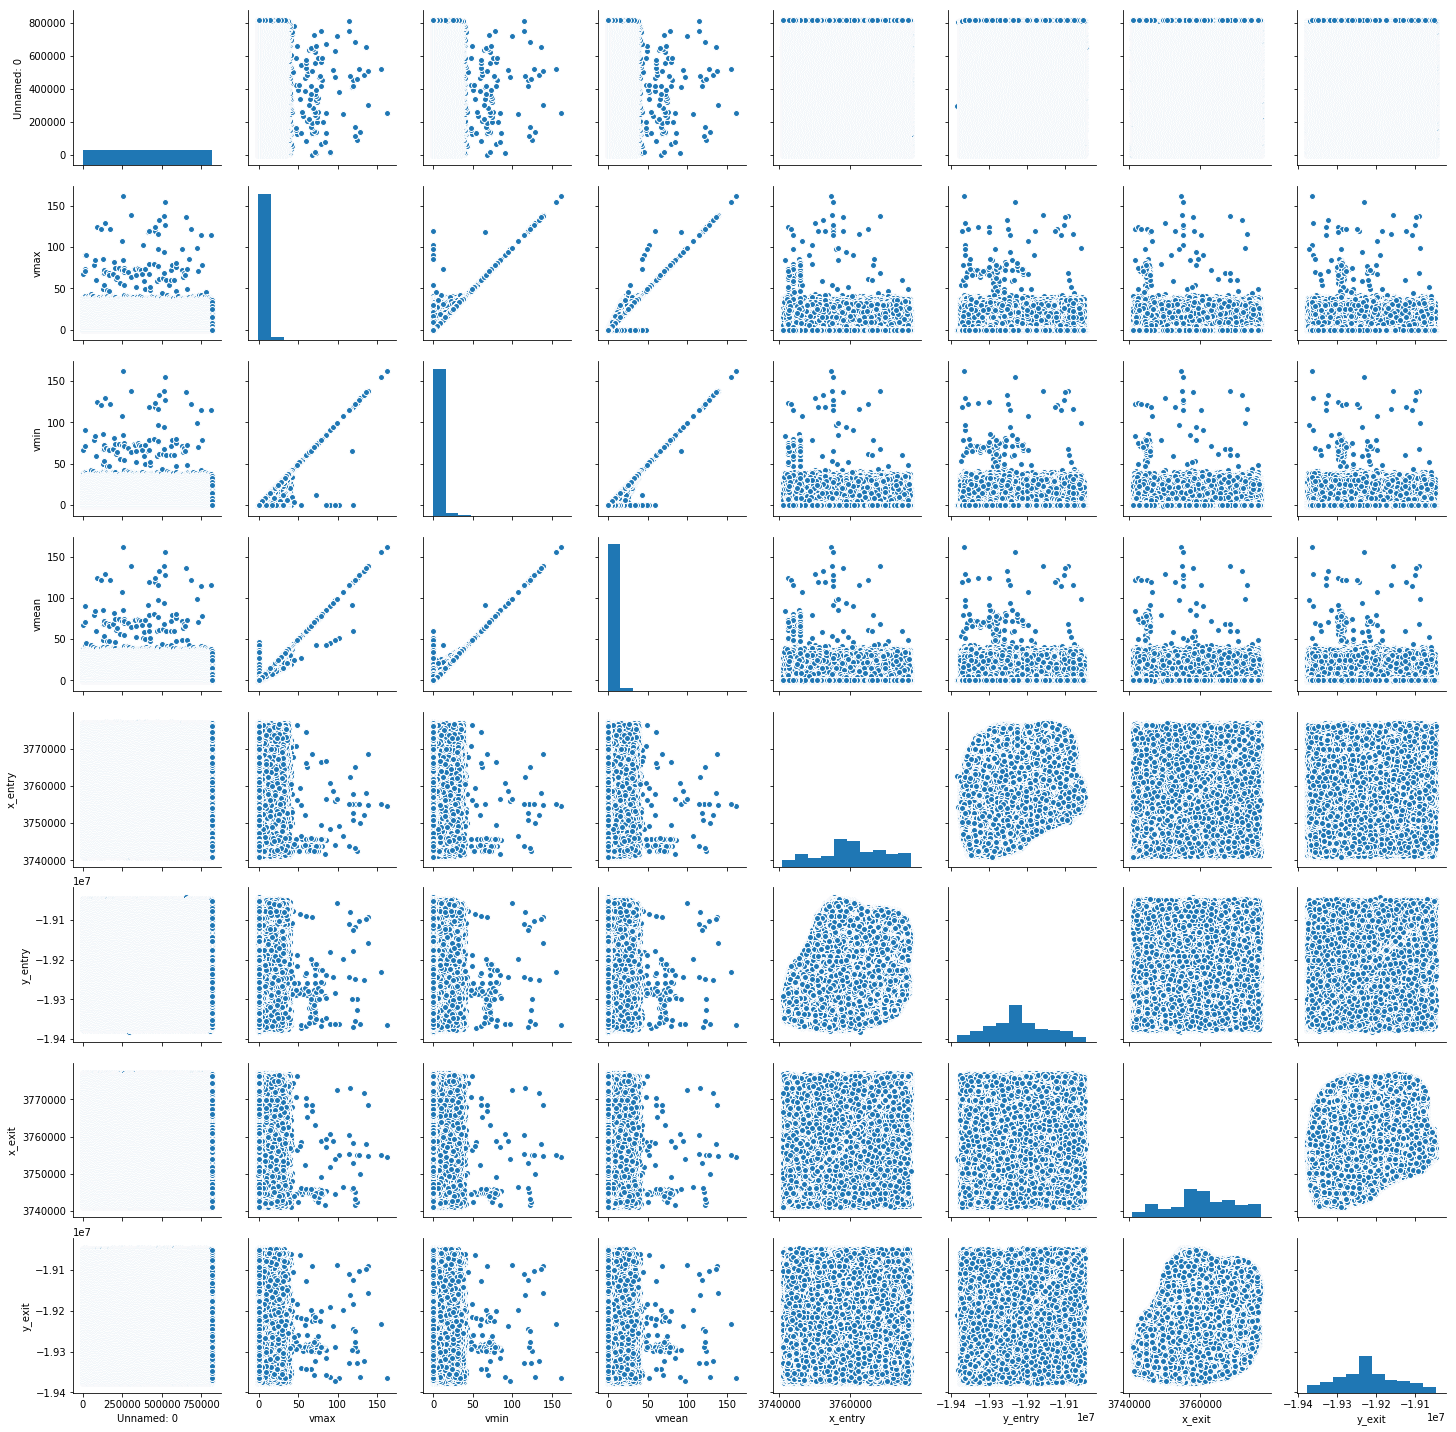

In [7]:
d = data.fillna(0)
sns.pairplot(d)

## 2.2 Time 

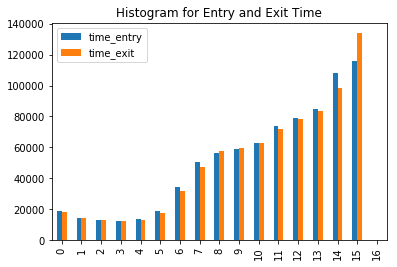

In [89]:
time_entry = pd.to_datetime(data['time_entry'], format='%H:%M:%S')#.apply(lambda x: x.strftime(r'%H:%M:%S'))#.astype("datetime64")
time_exit  = pd.to_datetime(data['time_exit'], format='%H:%M:%S')#.apply(lambda x: x.strftime(r'%H:%M:%S'))#.astype("datetime64")

pd.concat([time_entry.groupby([time_entry.dt.hour]).count(), time_exit.groupby([time_exit.dt.hour]).count()], axis=1) \
    .plot(kind='bar', title="Histogram for Entry and Exit Time")

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


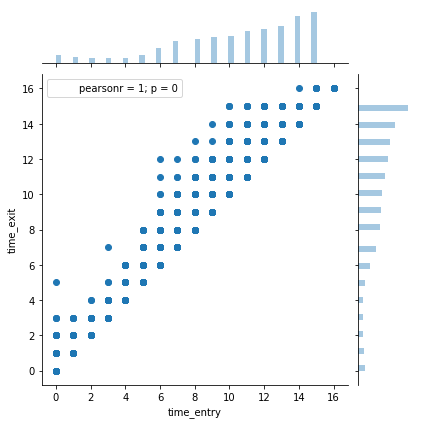

In [103]:
sns.jointplot(x="time_entry", y="time_exit", 
              data=pd.DataFrame(pd.concat([time_entry.dt.hour, time_exit.dt.hour], axis=1)))


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


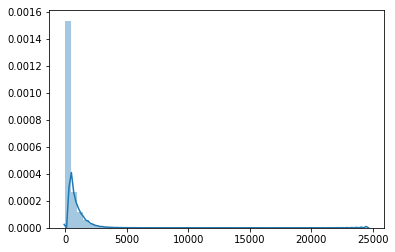

In [41]:
duration = (data['time_exit'] - data['time_entry']).dt.total_seconds().astype(int)
sns.distplot(duration)

## 2.3 Space

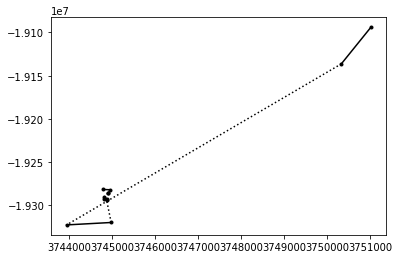

In [89]:
for i in range(6):
    plt.plot((data['x_entry'][i], data['x_exit'][i]), (data['y_entry'][i], data['y_exit'][i]), 'k-', marker=".")
    if i < 5:
        plt.plot((data['x_exit'][i], data['x_entry'][i+1]), (data['y_exit'][i], data['y_entry'][i+1]), 'k:')

In [56]:
devices = data.groupby('hash')

In [95]:
tname   = []
tlength = []
for name, group in devices:
    tname.append(name)
    tlength.append(group.shape[0])
tname   = pd.Series(tname)
tlength = pd.Series(tlength)

In [98]:
# minimum and maximum trajectory length for single device
print(tlength.min(), tlength.max())

1 20


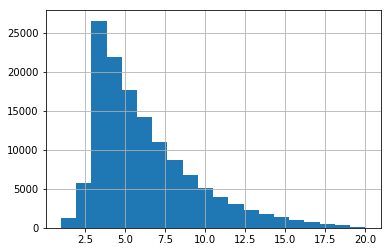

In [71]:
pd.Series(tlength).hist(bins=20)

In [106]:
# get examples of trajectory with length 1
data[data['hash'].isin(tname[tlength==1])]

,Unnamed: 0,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,duration
651,651,003701810d0b3e69732ec05654769d16_9,traj_003701810d0b3e69732ec05654769d16_9_3,1900-01-01 15:08:27,1900-01-01 15:13:36,NaN,NaN,NaN,3.759756e+06,-1.911922e+07,3.758231e+06,-1.914159e+07,309
1348,1348,00713e9907826da5e8b6ddefcba51770_3,traj_00713e9907826da5e8b6ddefcba51770_3_0,1900-01-01 15:24:03,1900-01-01 15:24:26,NaN,NaN,NaN,3.742580e+06,-1.928732e+07,3.742601e+06,-1.929408e+07,23
1515,1515,0082a8207f0a1240210aa02f14921394_5,traj_0082a8207f0a1240210aa02f14921394_5_0,1900-01-01 14:59:04,1900-01-01 15:09:00,NaN,NaN,NaN,3.758777e+06,-1.912366e+07,3.760882e+06,-1.913878e+07,596
2231,2231,00c04d3c0b35f93429fe0fc32eff21f8_29,traj_00c04d3c0b35f93429fe0fc32eff21f8_29_0,1900-01-01 14:59:15,1900-01-01 15:03:13,NaN,NaN,NaN,3.743534e+06,-1.928686e+07,3.744788e+06,-1.929294e+07,238
2556,2556,00dd3e54b391a940c425e38d2236d404_11,traj_00dd3e54b391a940c425e38d2236d404_11_0,1900-01-01 15:07:24,1900-01-01 15:13:46,67.117546,67.117546,67.117546,3.745866e+06,-1.920858e+07,3.744994e+06,-1.928640e+07,382
2883,2883,00f855467f62135e5c8f796f6d0254cf_15,traj_00f855467f62135e5c8f796f6d0254cf_15_0,1900-01-01 15:22:38,1900-01-01 15:22:38,NaN,NaN,NaN,3.744994e+06,-1.928538e+07,3.744994e+06,-1.928538e+07,0
4030,4030,01507f8f02b6fa7b53b247f34df0d687_19,traj_01507f8f02b6fa7b53b247f34df0d687_19_1,1900-01-01 15:39:33,1900-01-01 15:43:07,NaN,NaN,NaN,3.754262e+06,-1.928780e+07,3.754993e+06,-1.927608e+07,214
4283,4283,01640492832ad51aa13603e22ea73c75_23,traj_01640492832ad51aa13603e22ea73c75_23_0,1900-01-01 15:01:38,1900-01-01 15:03:17,NaN,NaN,NaN,3.745139e+06,-1.929017e+07,3.745104e+06,-1.928915e+07,99
4785,4785,0187a271d6d2454002e1da81064768a3_11,traj_0187a271d6d2454002e1da81064768a3_11_0,1900-01-01 15:22:24,1900-01-01 15:22:24,0.000000,0.000000,0.000000,3.744770e+06,-1.928902e+07,3.744770e+06,-1.928902e+07,0
5158,5158,01a04e2c2b4816b562c65e0dd61ca8c0_29,traj_01a04e2c2b4816b562c65e0dd61ca8c0_29_0,1900-01-01 14:34:13,1900-01-01 15:09:44,NaN,NaN,NaN,3.745680e+06,-1.920859e+07,3.758040e+06,-1.923868e+07,2131


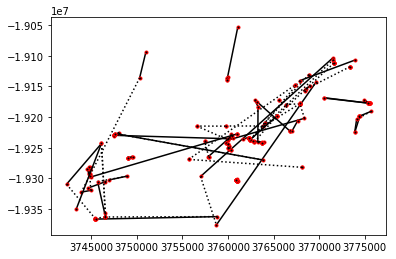

In [63]:
limit = 20
for name, group in devices:
    
    limit -= 1
    if limit<0: break
#     if limit==0: continue
    
    points = group.shape[0]
    for p in range(points):
        i = group.index[p] 
        plt.plot((group['x_entry'][i], group['x_exit'][i]), (group['y_entry'][i], group['y_exit'][i]), 'k-', marker=".", markeredgecolor="r")
        if p < (points-1):
            plt.plot((group['x_exit'][i], group['x_entry'][i+1]), (group['y_exit'][i], group['y_entry'][i+1]), 'k:')

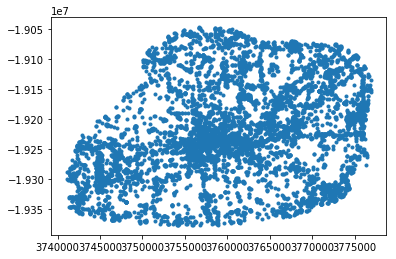

In [112]:
plt.scatter(data['x_entry'][:10000], data['y_entry'][:10000], marker='.')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


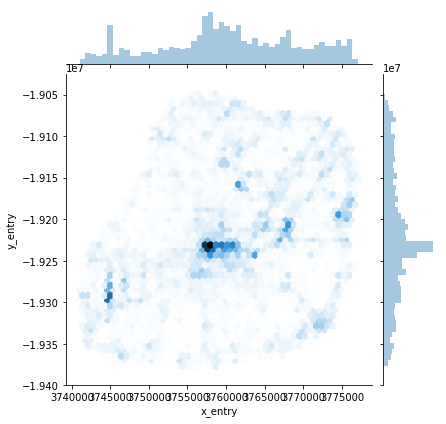

In [114]:
sns.jointplot(data['x_entry'], data['y_entry'], kind="hex")

In [153]:
print("Device in city center at 15:00: ", (data['x_exit'].between(3750901.5068, 3770901.5068) 
  & data['y_exit'].between((-19268905.6133), -19208905.6133)
  & (data['time_exit'].dt.hour>=15)).sum(), " / ", (data['time_exit'].dt.hour>=15).sum())

Device in city center at 15:00:  36380  /  134063


## 2.3 Velocity

In [148]:
(data['time_exit'].dt.hour>14).sum()

134063

In [156]:
data[data['time_exit'].dt.hour>14]['hash'].unique().shape

(134063,)

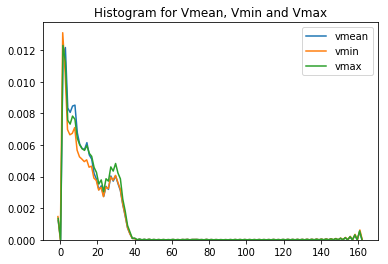

In [73]:
vmean = data['vmean'].dropna()
vmin = data['vmin'].dropna()
vmax = data['vmax'].dropna()

plt.title("Histogram for Vmean, Vmin and Vmax")
sns.distplot(vmean, hist=False, label="vmean", axlabel=False)
sns.distplot(vmin, hist=False, label="vmin", axlabel=False)
sns.distplot(vmax, hist=False, label="vmax", axlabel=False)

- most trajectories have velocity < 20
- most trajectories have similar vmin, vmax and vmean values (probably)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


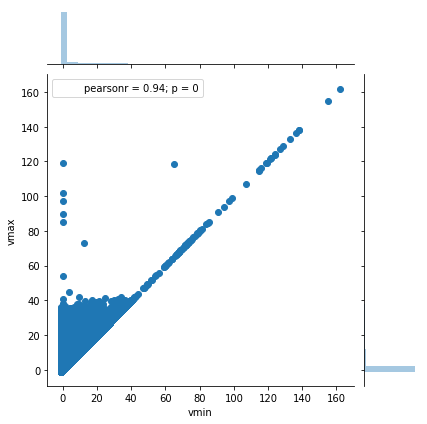

In [76]:
sns.jointplot(x="vmin", y="vmax", data=data[['vmin', 'vmax']].dropna())

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


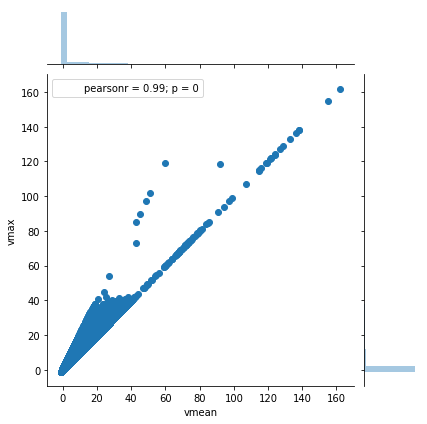

In [82]:
sns.jointplot(x="vmean", y="vmax", data=data[['vmean', 'vmax']].dropna())